In [40]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [42]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [43]:
coordinates

[(65.12874499703943, -54.081338020733185),
 (68.7051157028045, 95.16031734444437),
 (74.98356608650815, 133.0744300478708),
 (17.505893051897246, 152.9460194402398),
 (89.40527402023804, 63.27189967402788),
 (-56.83248633428636, 139.76618108773448),
 (-54.97708556196303, 140.17561170292635),
 (-81.9658241255322, 151.33433534684696),
 (9.834359647311985, -47.37031056666899),
 (-61.947281745824064, 168.59097817749637),
 (63.61089941899394, -113.3557379004316),
 (76.20026412202213, 166.77960393097487),
 (58.80064203221238, 132.95251158688967),
 (62.36835929704412, 117.98492259268357),
 (19.338168726130718, 28.183864857750194),
 (21.8615664778725, 66.97864952132309),
 (-9.162405971225922, 94.14649115950931),
 (18.779863934991283, 24.85708565588604),
 (24.228369465702386, -45.13244192940414),
 (63.9685470585504, -155.16565246107365),
 (18.415683222686567, -92.51021342346728),
 (32.611808624267354, -153.64289247482915),
 (-85.23603860799804, -130.4954222001976),
 (-48.87933168110487, 123.731

In [44]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [45]:
from citipy import citipy

In [46]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [48]:
cities

['maniitsoq',
 'tura',
 'nizhneyansk',
 'kavieng',
 'amderma',
 'new norfolk',
 'bluff',
 'cayenne',
 'yellowknife',
 'pevek',
 'ust-maya',
 'suntar',
 'marawi',
 'dwarka',
 'bengkulu',
 'kutum',
 'codrington',
 'kenai',
 'frontera',
 'ahuimanu',
 'rikitea',
 'albany',
 'basco',
 'hilo',
 'qaanaaq',
 'saint-philippe',
 'barrow',
 'talgar',
 'cabo san lucas',
 'ushuaia',
 'puerto ayora',
 'bom jardim',
 'lindenhurst',
 'bambous virieux',
 'havre-saint-pierre',
 'bredasdorp',
 'atuona',
 'opuwo',
 'cape town',
 'hermanus',
 'hobart',
 'barra dos coqueiros',
 'punta arenas',
 'apollonia',
 'kathu',
 'lahr',
 'tiksi',
 'vaini',
 'busselton',
 'ahipara',
 'port elizabeth',
 'chimbarongo',
 'tabiauea',
 'narovchat',
 'forbes',
 'cidreira',
 'marrakesh',
 'butaritari',
 'dikson',
 'castro',
 'alyangula',
 'azul',
 'carnarvon',
 'severo-kurilsk',
 'mount gambier',
 'beloha',
 'san patricio',
 'tres arroyos',
 'luderitz',
 'leningradskiy',
 'barabai',
 'kiama',
 'mataura',
 'alexandria',
 'skje

In [49]:
import requests


In [50]:
conda install -c conda-forge requests

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [51]:
# Import the API key.
from config import weather_api_key

In [52]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4d5ea3cb53e6ed4c59cc0e64aea22fc0


In [53]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | seymchan
Processing Record 8 of Set 1 | san policarpo
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | lucapa
Processing Record 12 of Set 1 | sao gabriel da cachoeira
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | ust-tsilma
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | malartic
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Recor

Processing Record 39 of Set 4 | east london
Processing Record 40 of Set 4 | thanh hoa
Processing Record 41 of Set 4 | enshi
Processing Record 42 of Set 4 | atar
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | ilheus
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | puerto escondido
Processing Record 47 of Set 4 | chak
Processing Record 48 of Set 4 | qui nhon
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | palafrugell
Processing Record 1 of Set 5 | sao joao de pirabas
Processing Record 2 of Set 5 | harper
Processing Record 3 of Set 5 | talcahuano
Processing Record 4 of Set 5 | erzin
Processing Record 5 of Set 5 | baruun-urt
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 | lebu
Processing Record 8 of Set 5 | luoyang
Processing Record 9 of Set 5 | amancio
City not found. Skipping...
Processing Record 10 of Set 5 | shahr-e kord
Processing Record 11 of 

Processing Record 29 of Set 8 | tobias barreto
Processing Record 30 of Set 8 | tambura
Processing Record 31 of Set 8 | gijon
Processing Record 32 of Set 8 | ust-koksa
Processing Record 33 of Set 8 | uchaly
Processing Record 34 of Set 8 | tajao
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | lamar
Processing Record 37 of Set 8 | presidencia roque saenz pena
Processing Record 38 of Set 8 | sungaipenuh
Processing Record 39 of Set 8 | nguru
Processing Record 40 of Set 8 | nishihara
Processing Record 41 of Set 8 | clarence town
Processing Record 42 of Set 8 | churapcha
Processing Record 43 of Set 8 | hithadhoo
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | vanimo
Processing Record 46 of Set 8 | reconquista
Processing Record 47 of Set 8 | santa marta
Processing Record 48 of Set 8 | kapit
Processing Record 49 of Set 8 | veraval
Processing Record 50 of Set 8 | deputatskiy
Processing Record 1 of Set 9 | xining
Processing Reco

Processing Record 18 of Set 12 | jutai
Processing Record 19 of Set 12 | okandja
City not found. Skipping...
Processing Record 20 of Set 12 | don sak
Processing Record 21 of Set 12 | myitkyina
Processing Record 22 of Set 12 | yaval
Processing Record 23 of Set 12 | talcher
Processing Record 24 of Set 12 | monywa
Processing Record 25 of Set 12 | izumo
Processing Record 26 of Set 12 | aripuana
Processing Record 27 of Set 12 | pachino
Processing Record 28 of Set 12 | oistins
Processing Record 29 of Set 12 | tura
Processing Record 30 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 31 of Set 12 | pedernales
Processing Record 32 of Set 12 | bacuit
City not found. Skipping...
Processing Record 33 of Set 12 | teknaf
Processing Record 34 of Set 12 | korla
Processing Record 35 of Set 12 | morondava
Processing Record 36 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 37 of Set 12 | neiafu
Processing Record 38 of Set 12 | shchuchye
City not found. Skipping...


In [15]:
len(city_data)

577

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,36.00,60,20,4.61,US,2021-02-22 15:18:07
1,Punta Arenas,-53.1500,-70.9167,53.60,58,75,24.16,CL,2021-02-22 15:18:07
2,Kavieng,-2.5744,150.7967,81.86,79,46,9.80,PG,2021-02-22 15:18:07
3,Cape Town,-33.9258,18.4232,73.00,49,0,19.57,ZA,2021-02-22 15:14:41
4,Hermanus,-34.4187,19.2345,75.00,56,0,3.00,ZA,2021-02-22 15:18:07
5,Tuktoyaktuk,69.4541,-133.0374,-9.40,77,75,18.41,CA,2021-02-22 15:18:08
6,Seymchan,62.8833,152.4333,-34.28,99,45,1.10,RU,2021-02-22 15:18:08
7,San Policarpo,12.1791,125.5072,81.64,83,42,13.62,PH,2021-02-22 15:18:08
8,Alice Springs,-23.7000,133.8833,80.60,29,0,10.36,AU,2021-02-22 15:18:08
9,Lucapa,-8.4192,20.7447,75.56,83,100,1.90,AO,2021-02-22 15:18:08


In [17]:
new_column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-02-22 15:18:07,41.3712,-73.4140,36.00,60,20,4.61
1,Punta Arenas,CL,2021-02-22 15:18:07,-53.1500,-70.9167,53.60,58,75,24.16
2,Kavieng,PG,2021-02-22 15:18:07,-2.5744,150.7967,81.86,79,46,9.80
3,Cape Town,ZA,2021-02-22 15:14:41,-33.9258,18.4232,73.00,49,0,19.57
4,Hermanus,ZA,2021-02-22 15:18:07,-34.4187,19.2345,75.00,56,0,3.00


In [54]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

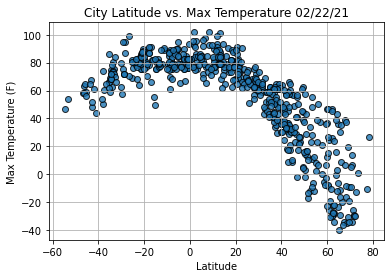

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

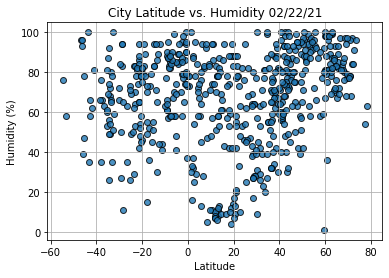

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

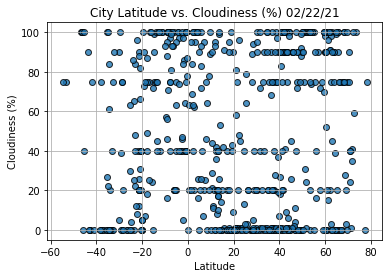

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

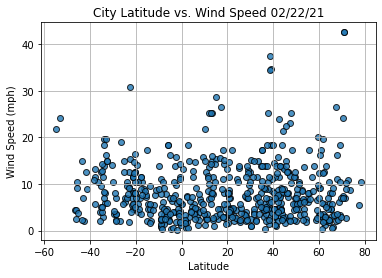

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]

In [28]:
index13

City                   Ust-Tsilma
Country                        RU
Date          2021-02-22 15:18:08
Lat                        65.441
Lng                       52.1498
Max Temp                   -11.27
Humidity                       89
Cloudiness                    100
Wind Speed                   4.68
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
572     True
573    False
574    False
575     True
576     True
Name: Lat, Length: 577, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-02-22 15:18:07,41.3712,-73.4140,36.00,60,20,4.61
5,Tuktoyaktuk,CA,2021-02-22 15:18:08,69.4541,-133.0374,-9.40,77,75,18.41
6,Seymchan,RU,2021-02-22 15:18:08,62.8833,152.4333,-34.28,99,45,1.10
7,San Policarpo,PH,2021-02-22 15:18:08,12.1791,125.5072,81.64,83,42,13.62
11,Naze,JP,2021-02-22 15:18:08,28.3667,129.4833,62.37,80,94,7.09
...,...,...,...,...,...,...,...,...,...
566,Kattivakkam,IN,2021-02-22 15:19:04,13.2167,80.3167,78.80,78,20,8.05
567,Khanpur,PK,2021-02-22 15:19:04,28.6453,70.6567,76.89,17,0,8.10
572,Saint-Augustin,CA,2021-02-22 15:19:05,51.2260,-58.6502,16.90,91,31,10.04
575,Mizdah,LY,2021-02-22 15:19:05,31.4451,12.9801,64.76,26,72,14.90


In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-02-22 15:18:07,41.3712,-73.4140,36.00,60,20,4.61
5,Tuktoyaktuk,CA,2021-02-22 15:18:08,69.4541,-133.0374,-9.40,77,75,18.41
6,Seymchan,RU,2021-02-22 15:18:08,62.8833,152.4333,-34.28,99,45,1.10
7,San Policarpo,PH,2021-02-22 15:18:08,12.1791,125.5072,81.64,83,42,13.62
11,Naze,JP,2021-02-22 15:18:08,28.3667,129.4833,62.37,80,94,7.09


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

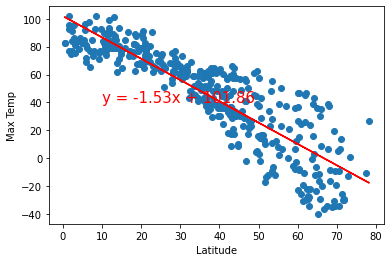

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

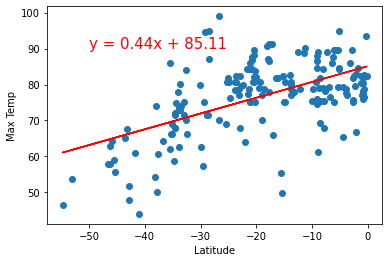

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

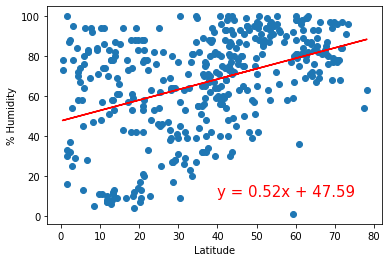

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

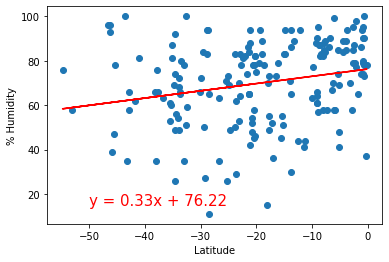

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

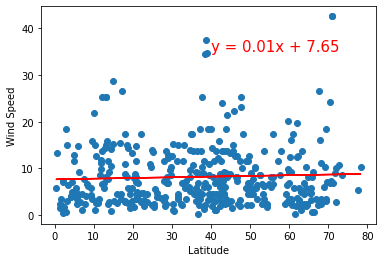

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

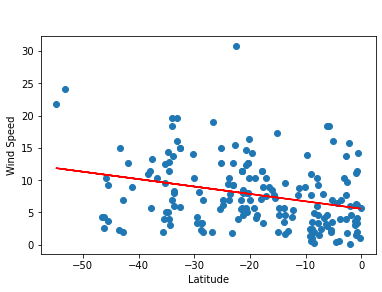

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [39]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
